In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fM3Long", "fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength  fWidth   fSize   fConc    fConc1  fM3Long  fM3Trans  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

           fAlpha     fDist class  
28.7967   40.0920   81.8828     g  
31.6036    6.3609  205.2610     g  
162.0520  76.9600  256.7880     g  
23.8172   10.4490  116.7370     g  
75.1362    4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength  fWidth   fSize   fConc    fConc1  fM3Long  fM3Trans  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

           fAlpha     fDist  class  
28.7967   40.0920   81.8828      1  
31.6036    6.3609  205.2610      1  
162.0520  76.9600  256.7880      1  
23.8172   10.4490  116.7370      1  
75.1362    4.6480  356.4620      1

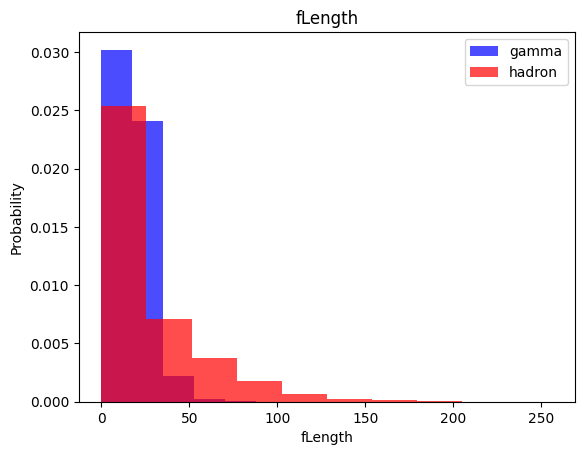

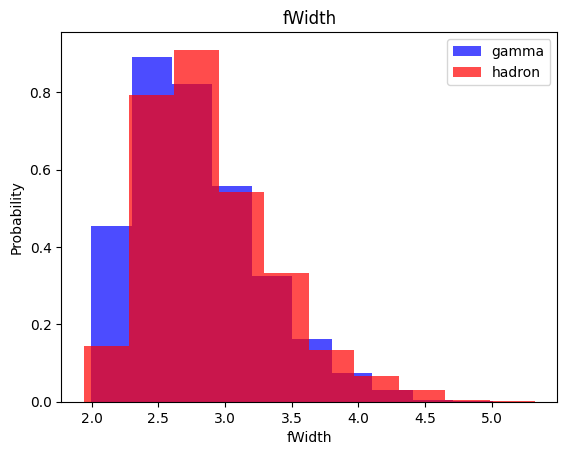

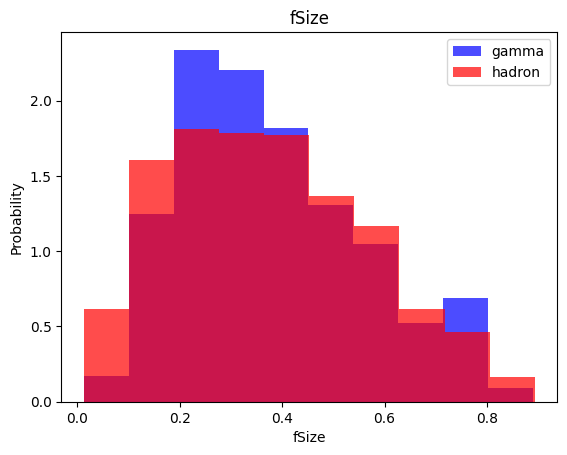

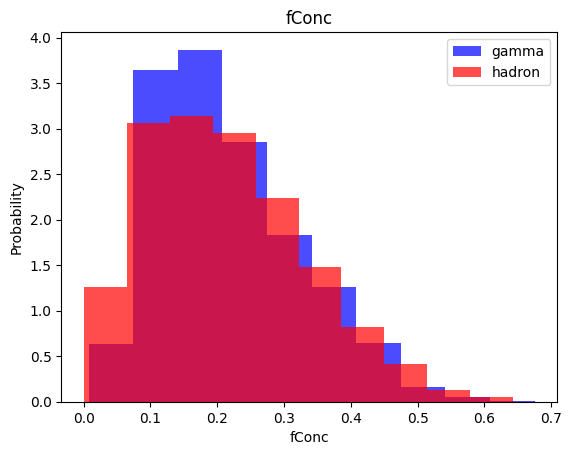

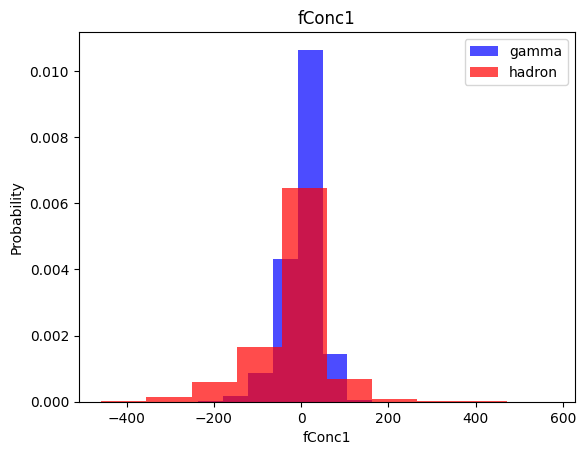

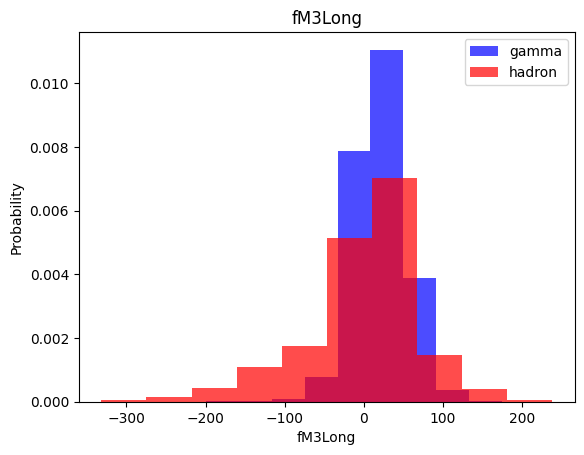

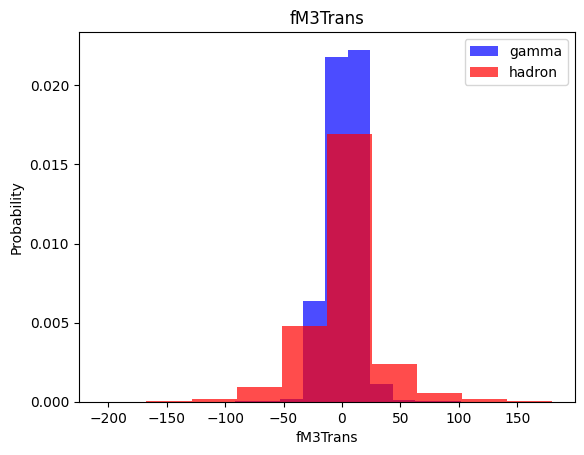

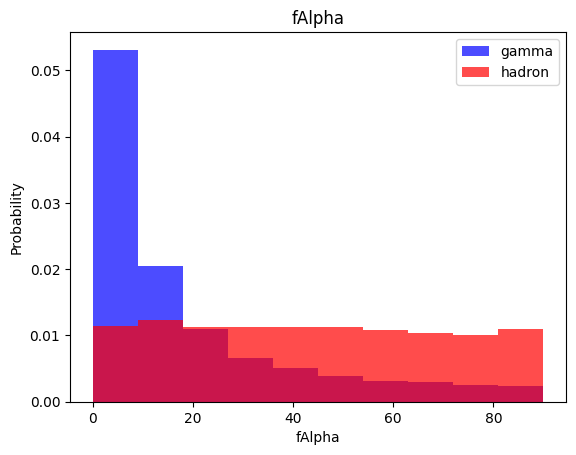

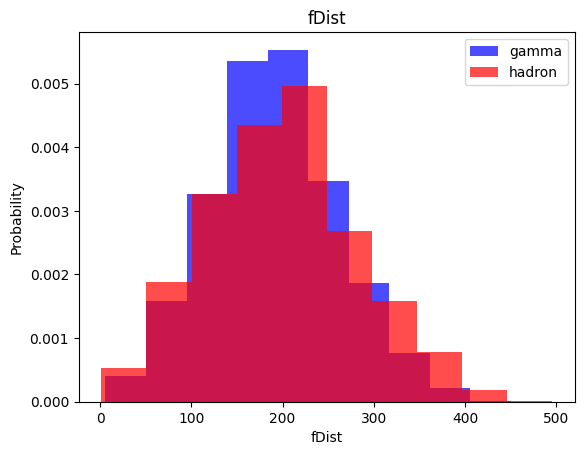

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, validation and test sets

In [ ]:
print(len(df))

19020


In [ ]:
df.reset_index(drop=True, inplace=True)
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fM3Long', 'fM3Trans',
       'fAlpha', 'fDist', 'class'],
      dtype='object')

In [ ]:
train ,valid,test = np.split(df.sample(frac=1), [int (0.6*len(df)) , int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,  y = ros.fit_resample(X , y)

  data = np.hstack((X , np.reshape(y , (-1, 1))))

  return data, X ,y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1318
           1       0.84      0.88      0.86      2486

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#NAIVE BAYE's

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
 nb_model = GaussianNB()
 nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
 y_pred = nb_model.predict(X_test)
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.47      0.56      1318
           1       0.76      0.90      0.82      2486

    accuracy                           0.75      3804
   macro avg       0.73      0.68      0.69      3804
weighted avg       0.74      0.75      0.73      3804



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1318
           1       0.84      0.81      0.83      2486

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [ ]:
from sklearn.svm import SVC #support vectro classifier

In [ ]:
svm_model= SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1318
           1       0.84      0.81      0.83      2486

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Neural Net


In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
    fid, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))
    ax1.plot(history.history['loss'], label='Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')

    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()


In [ ]:
import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(9,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid') #output node
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history


16 nodes, dropout 0, lr 0.01, batch size 132


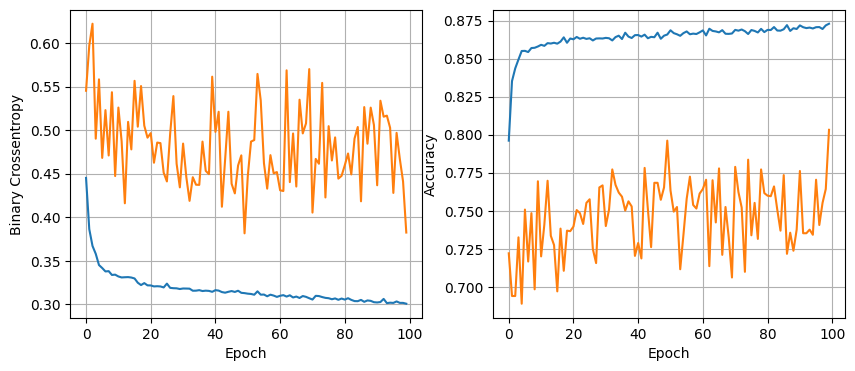

119/119 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8612
16 nodes, dropout 0, lr 0.01, batch size 64


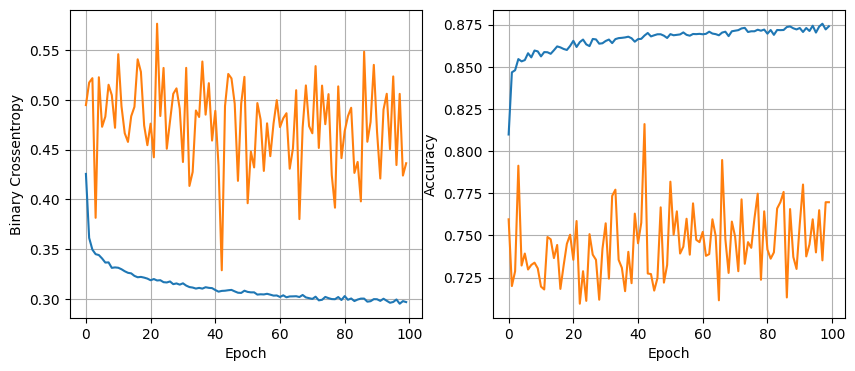

119/119 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8565
16 nodes, dropout 0, lr 0.01, batch size 128


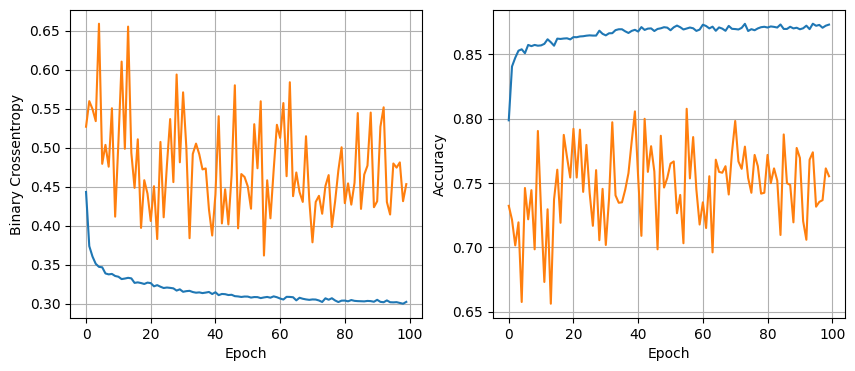

119/119 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8609
16 nodes, dropout 0, lr 0.005, batch size 132


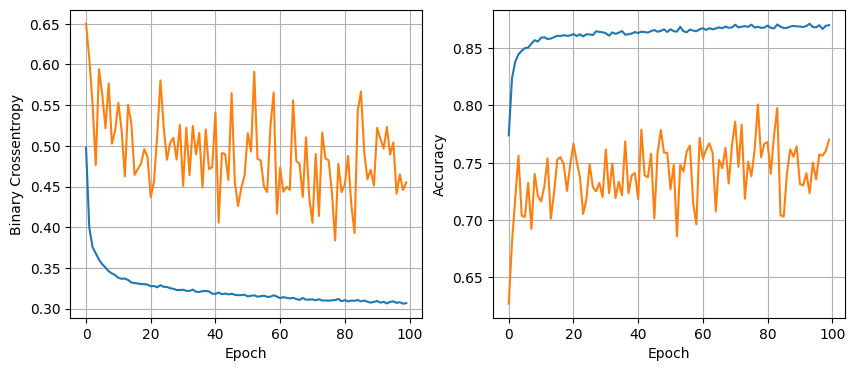

119/119 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8591
16 nodes, dropout 0, lr 0.005, batch size 64


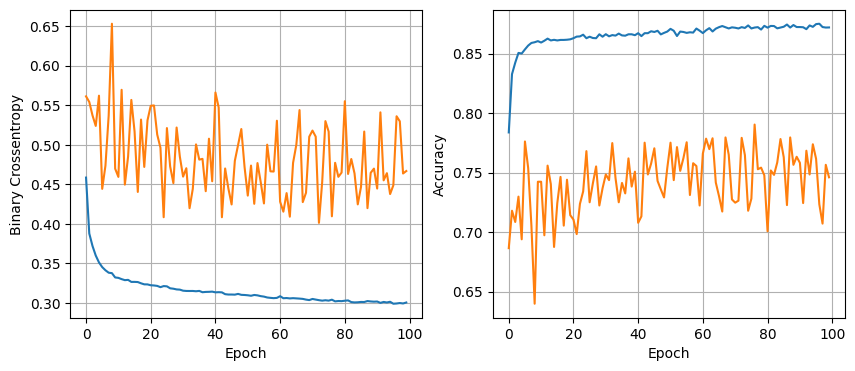

119/119 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8530
16 nodes, dropout 0, lr 0.005, batch size 128


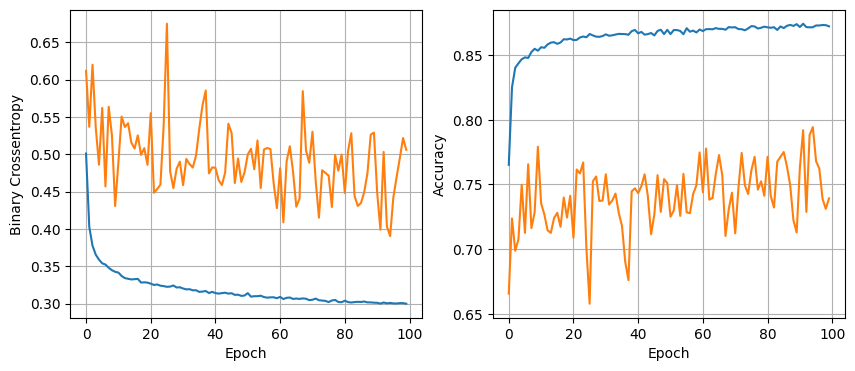

119/119 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8646
16 nodes, dropout 0, lr 0.001, batch size 132


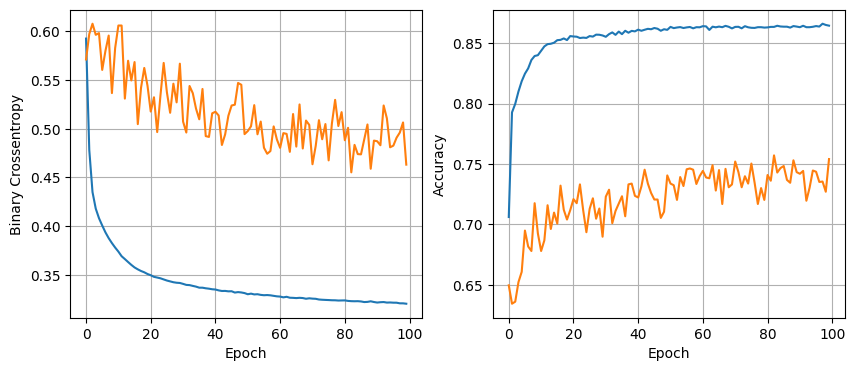

119/119 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8549
16 nodes, dropout 0, lr 0.001, batch size 64


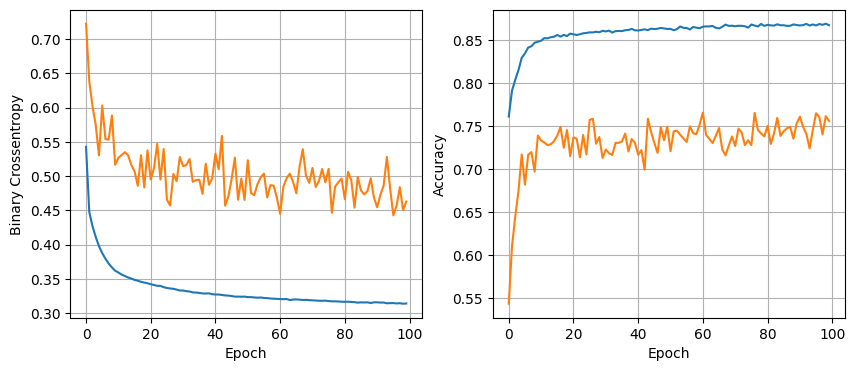

119/119 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8596
16 nodes, dropout 0, lr 0.001, batch size 128


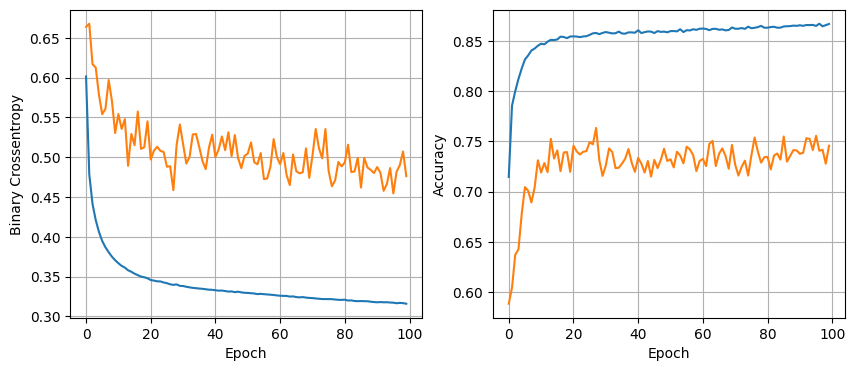

119/119 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.01, batch size 132


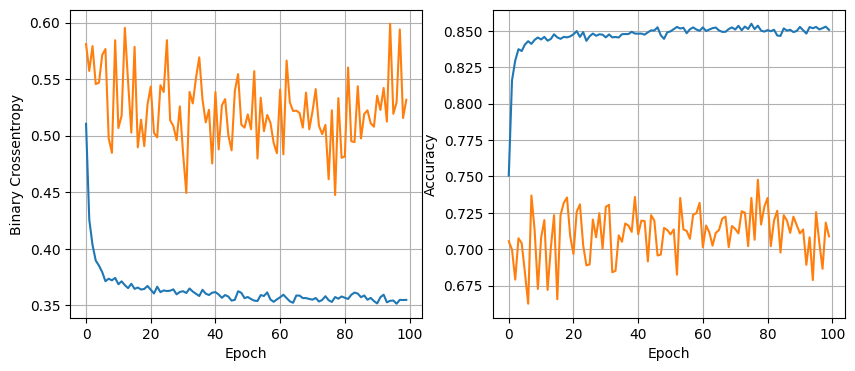

119/119 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8580
16 nodes, dropout 0.2, lr 0.01, batch size 64


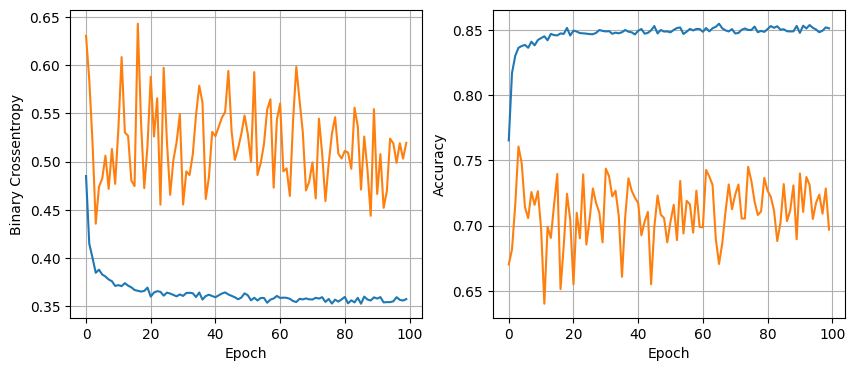

119/119 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8559
16 nodes, dropout 0.2, lr 0.01, batch size 128


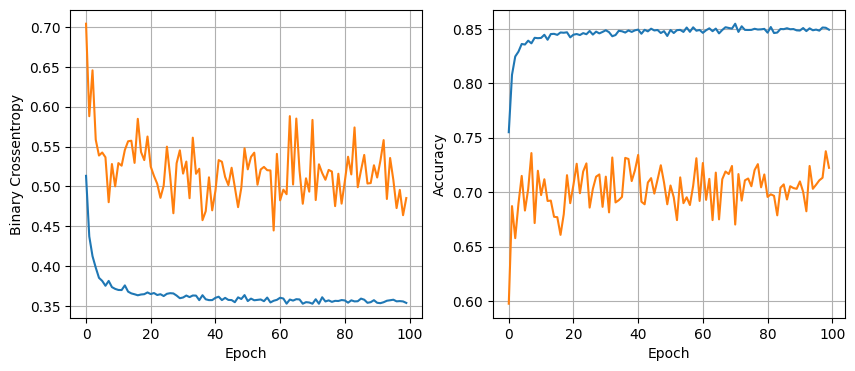

119/119 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8580
16 nodes, dropout 0.2, lr 0.005, batch size 132


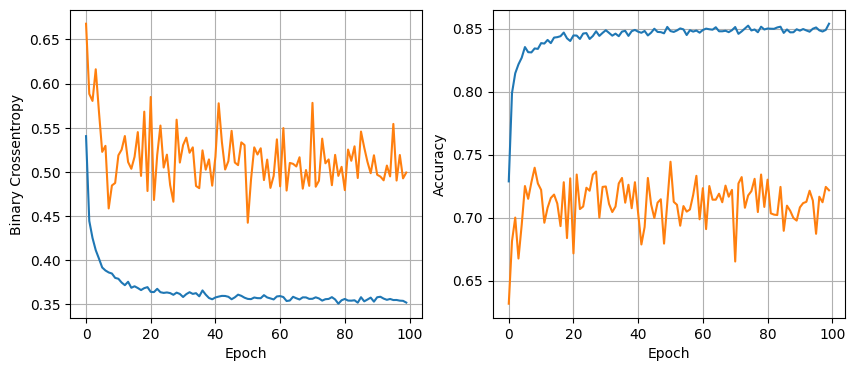

119/119 [==============================] - 1s 7ms/step - loss: 0.3258 - accuracy: 0.8583
16 nodes, dropout 0.2, lr 0.005, batch size 64


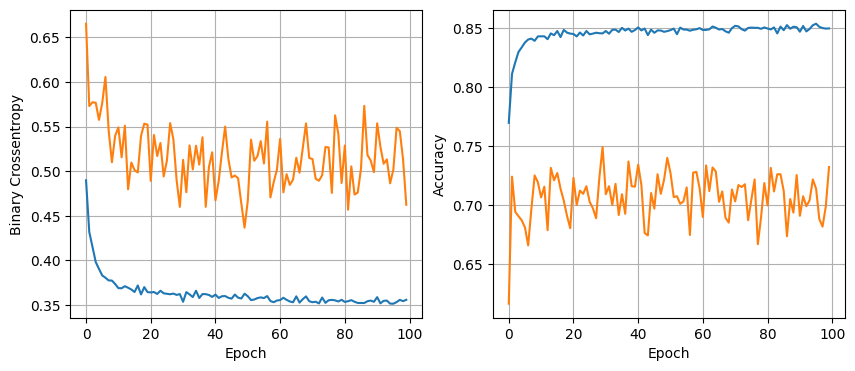

119/119 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8586
16 nodes, dropout 0.2, lr 0.005, batch size 128


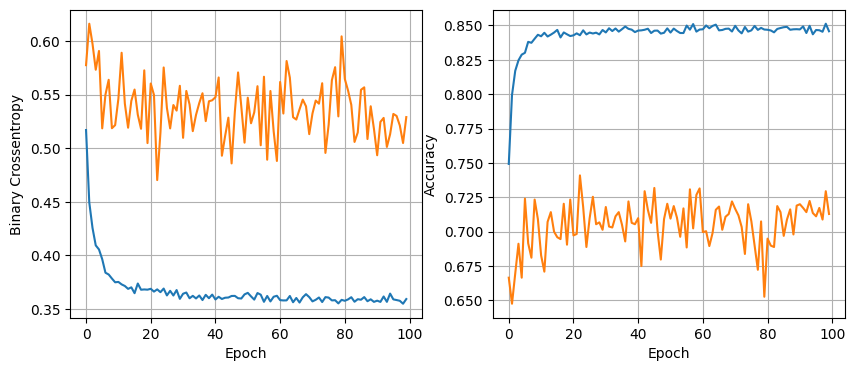

119/119 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8604
16 nodes, dropout 0.2, lr 0.001, batch size 132


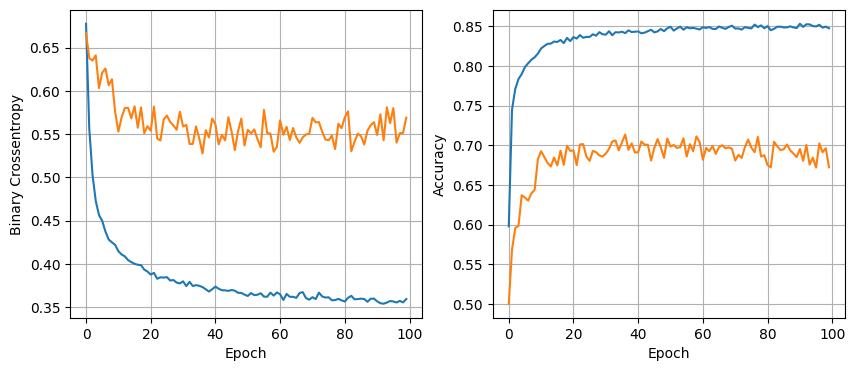

119/119 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8570
16 nodes, dropout 0.2, lr 0.001, batch size 64


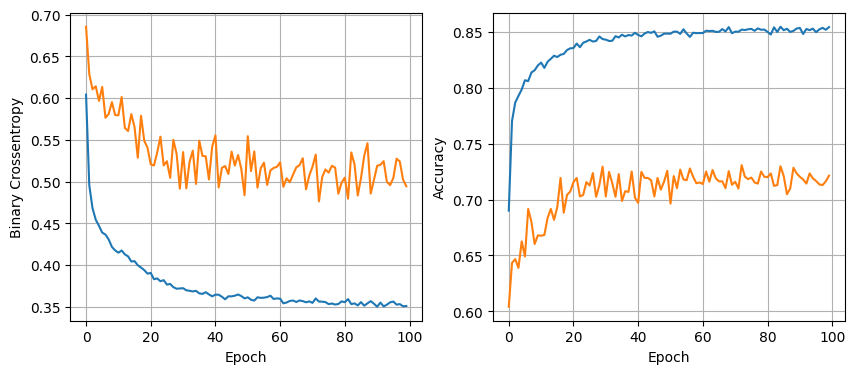

119/119 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8567
16 nodes, dropout 0.2, lr 0.001, batch size 128


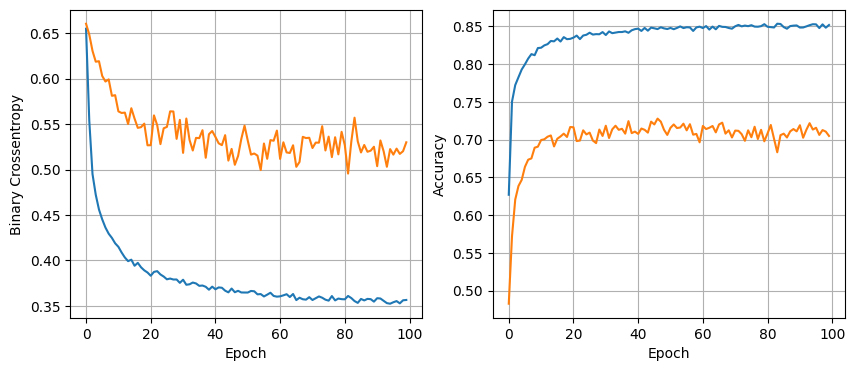

119/119 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8586
32 nodes, dropout 0, lr 0.01, batch size 132


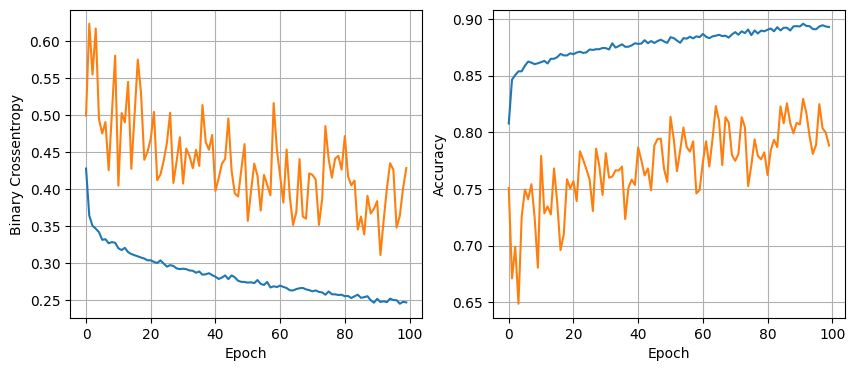

119/119 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8541
32 nodes, dropout 0, lr 0.01, batch size 64


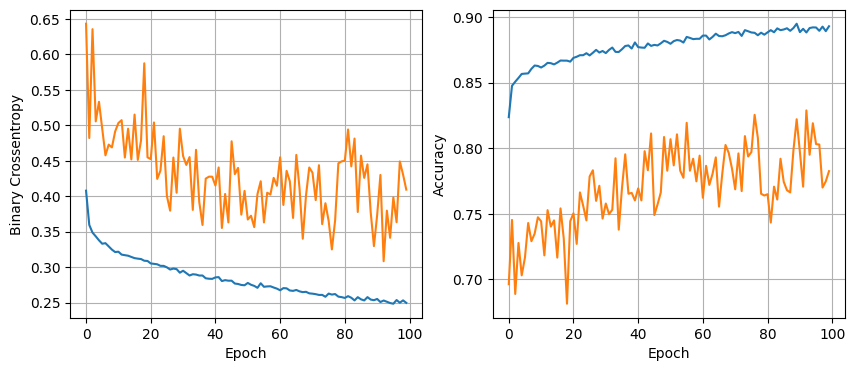

119/119 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8554
32 nodes, dropout 0, lr 0.01, batch size 128


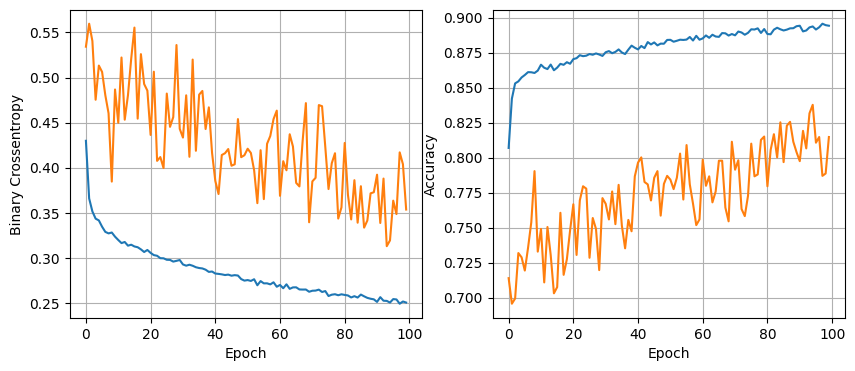

119/119 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8567
32 nodes, dropout 0, lr 0.005, batch size 132


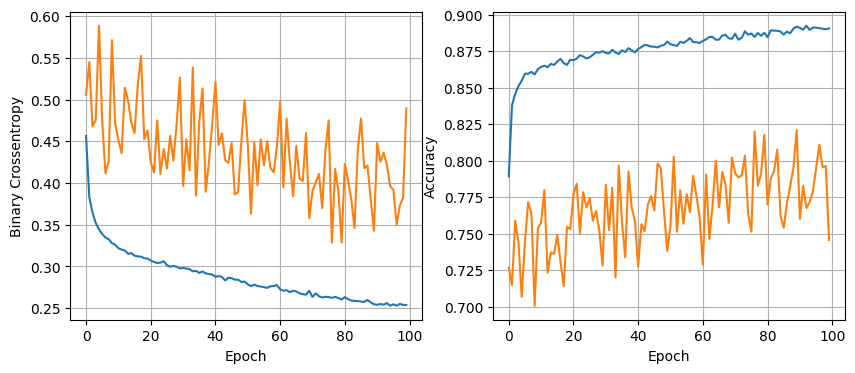

119/119 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8601
32 nodes, dropout 0, lr 0.005, batch size 64


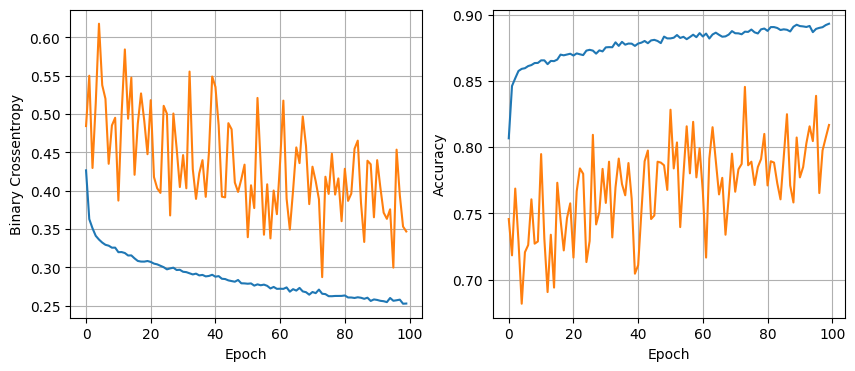

119/119 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8570
32 nodes, dropout 0, lr 0.005, batch size 128


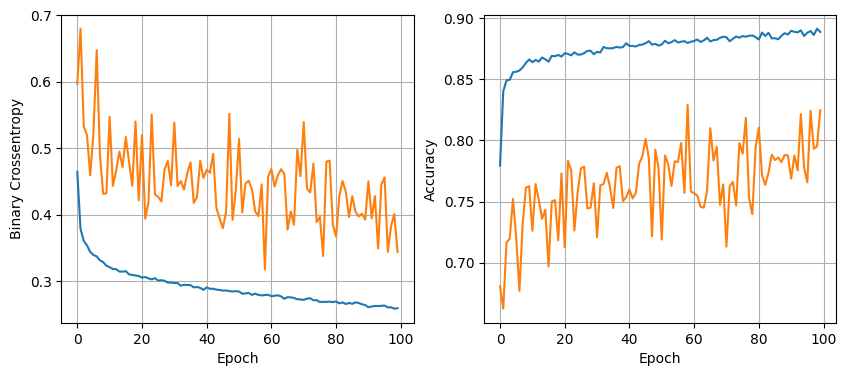

119/119 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8559
32 nodes, dropout 0, lr 0.001, batch size 132


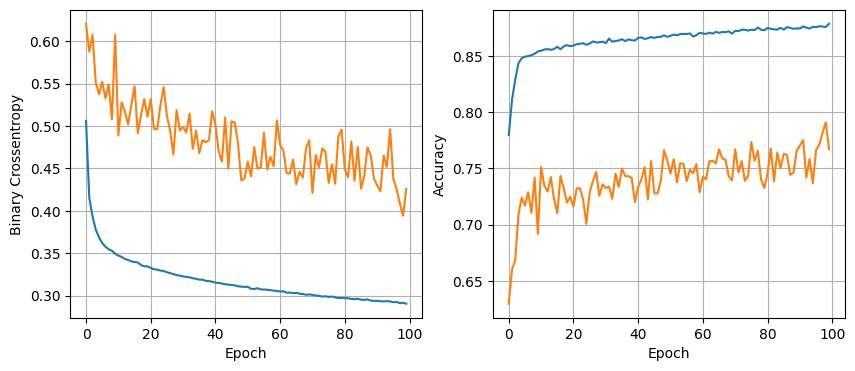

119/119 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8617
32 nodes, dropout 0, lr 0.001, batch size 64


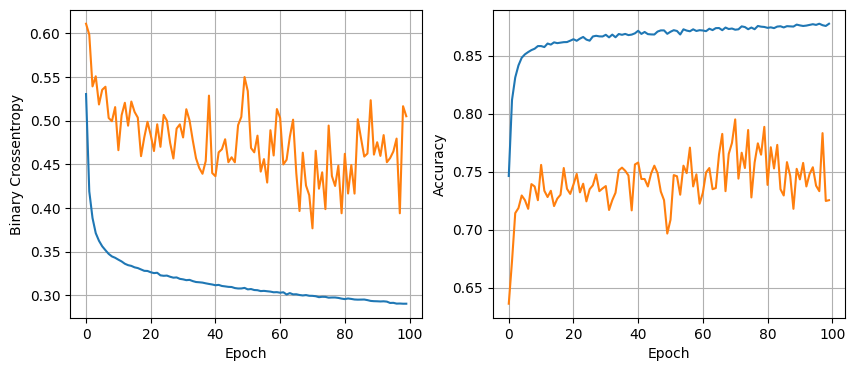

119/119 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.001, batch size 128


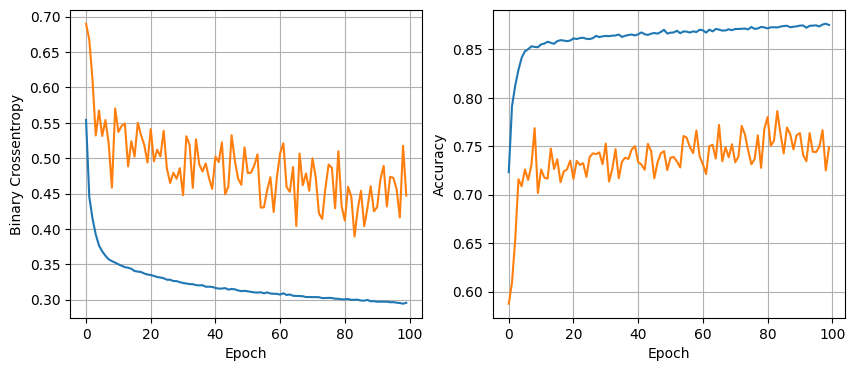

119/119 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8662
32 nodes, dropout 0.2, lr 0.01, batch size 132


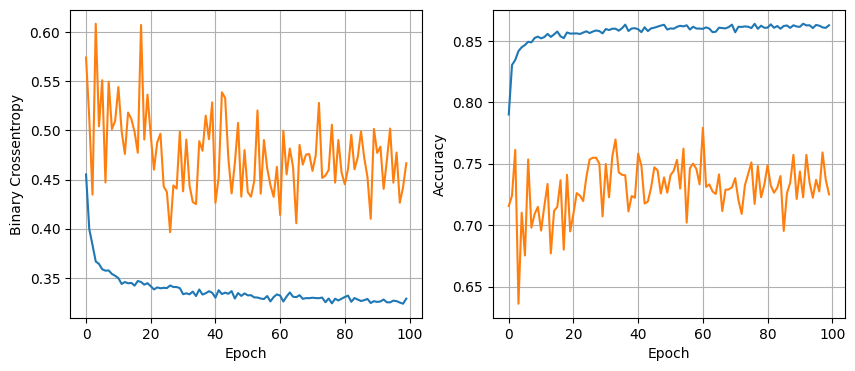

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8623
32 nodes, dropout 0.2, lr 0.01, batch size 64


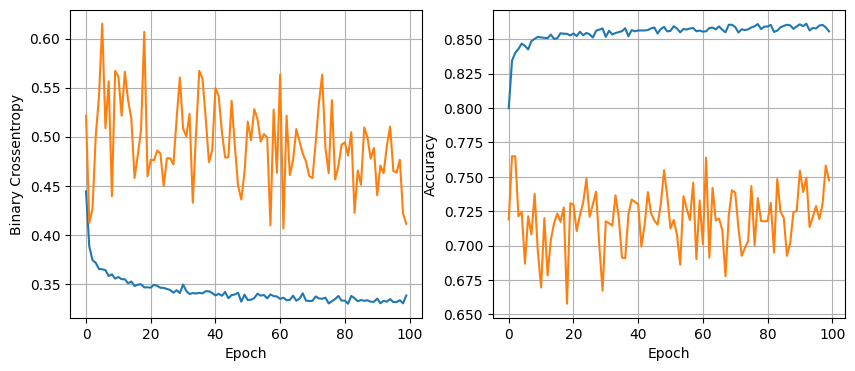

119/119 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8557
32 nodes, dropout 0.2, lr 0.01, batch size 128


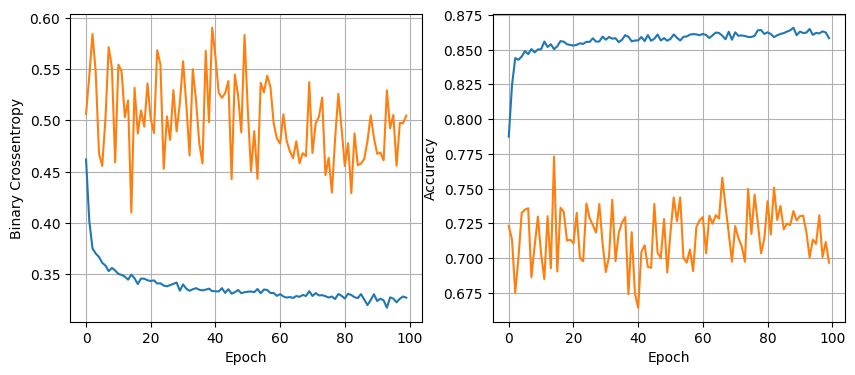

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8609
32 nodes, dropout 0.2, lr 0.005, batch size 132


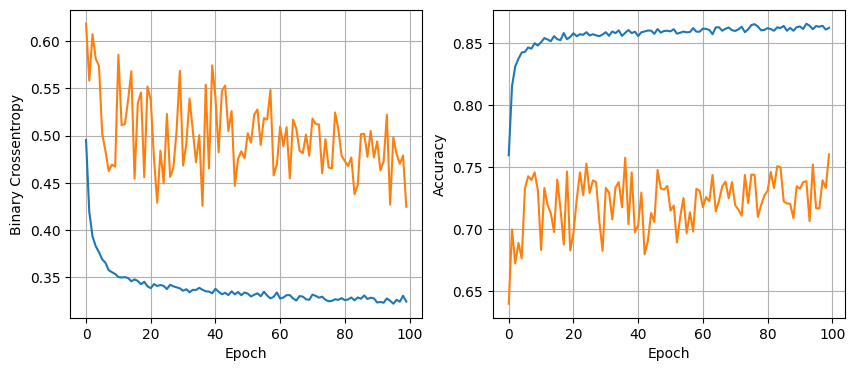

119/119 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8628
32 nodes, dropout 0.2, lr 0.005, batch size 64


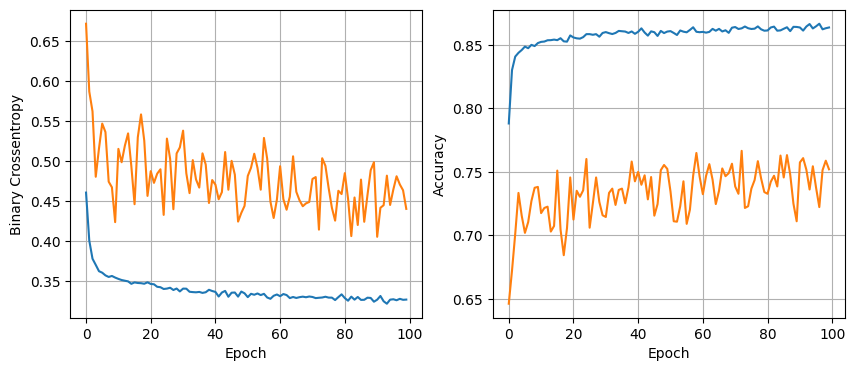

119/119 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8601
32 nodes, dropout 0.2, lr 0.005, batch size 128


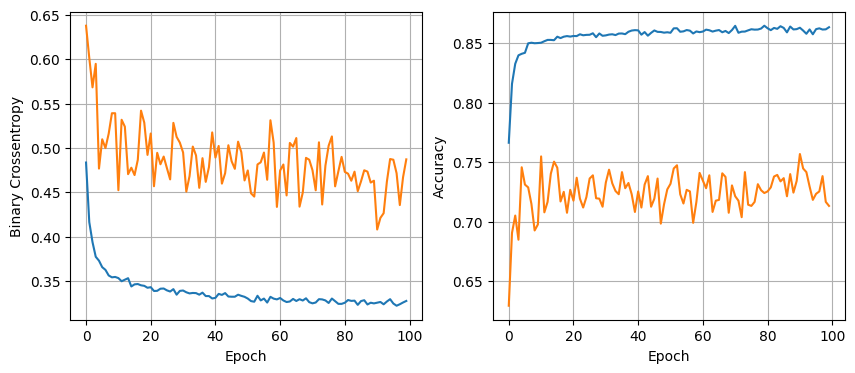

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8625
32 nodes, dropout 0.2, lr 0.001, batch size 132


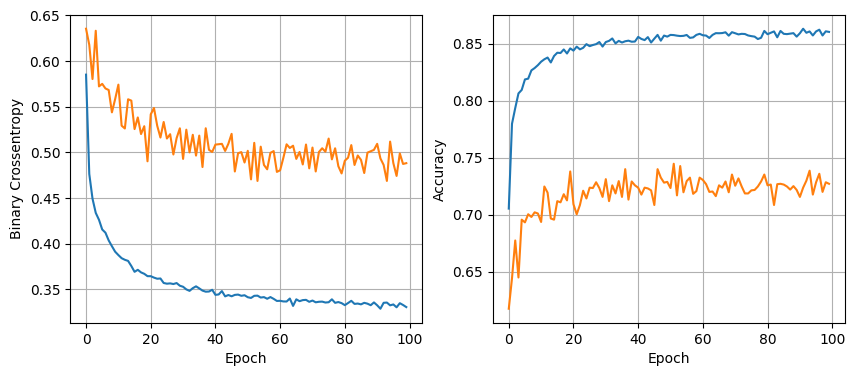

119/119 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8644
32 nodes, dropout 0.2, lr 0.001, batch size 64


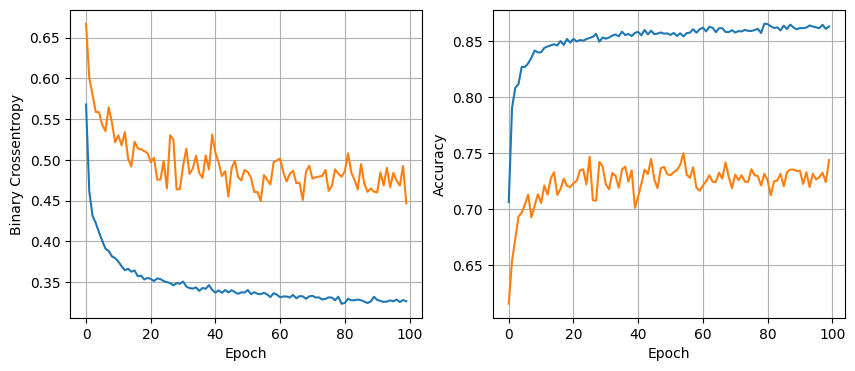

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8630
32 nodes, dropout 0.2, lr 0.001, batch size 128


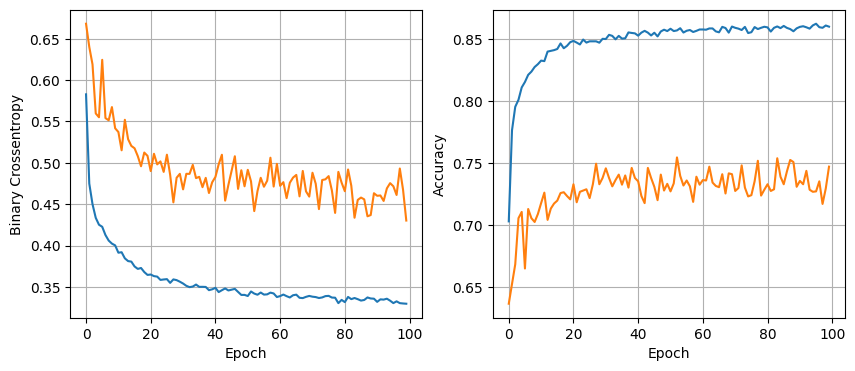

119/119 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8651
64 nodes, dropout 0, lr 0.01, batch size 132


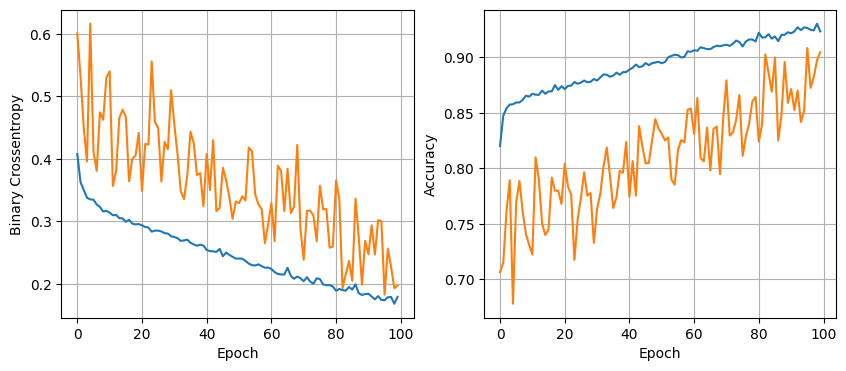

119/119 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.8396
64 nodes, dropout 0, lr 0.01, batch size 64


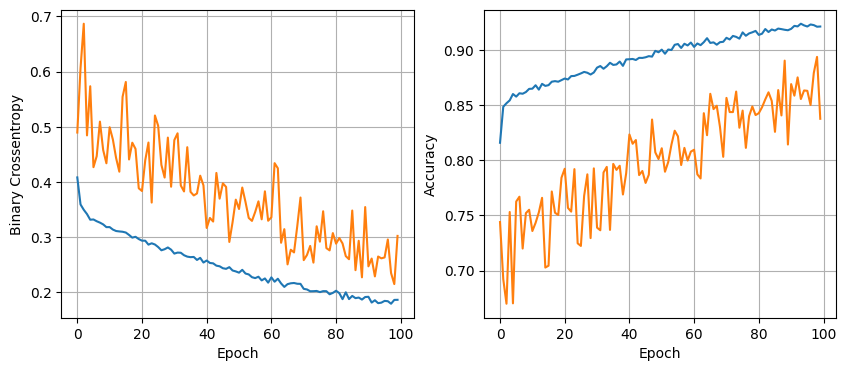

119/119 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.8454
64 nodes, dropout 0, lr 0.01, batch size 128


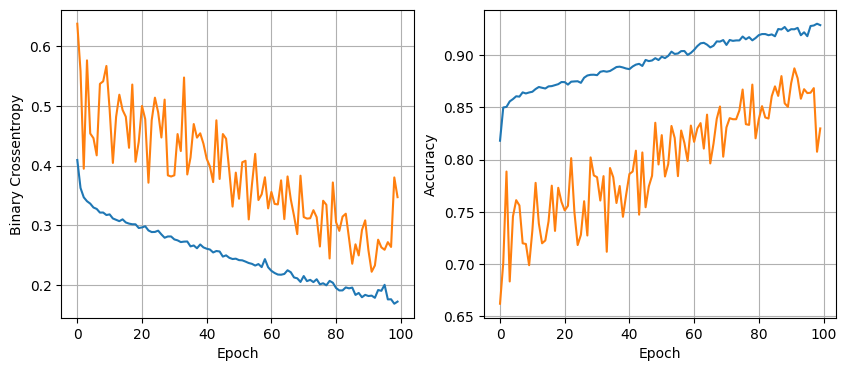

119/119 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.8470
64 nodes, dropout 0, lr 0.005, batch size 132


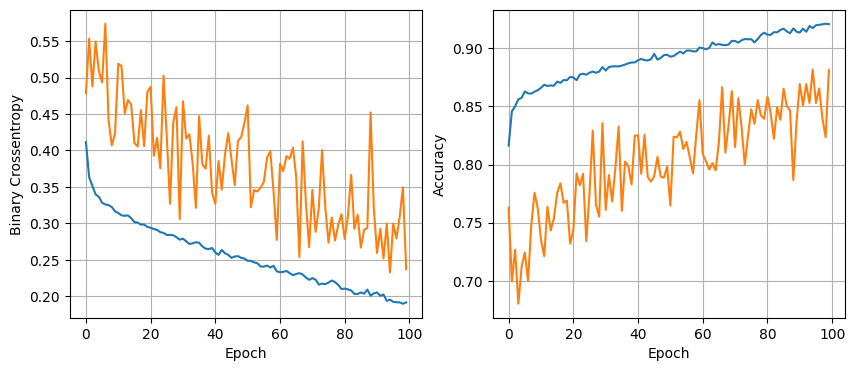

119/119 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8475
64 nodes, dropout 0, lr 0.005, batch size 64


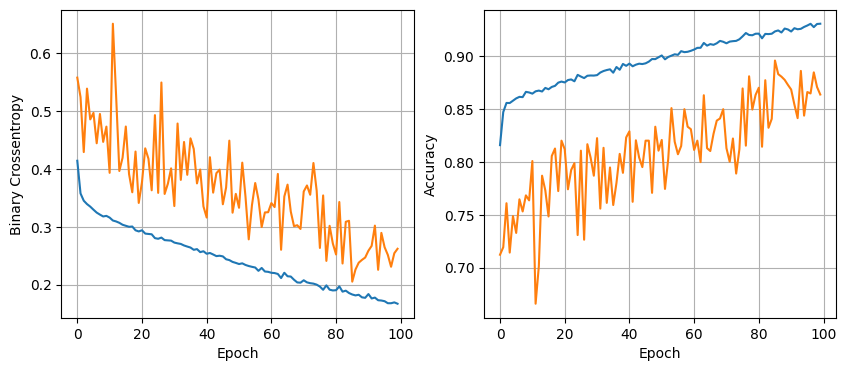

119/119 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.8389
64 nodes, dropout 0, lr 0.005, batch size 128


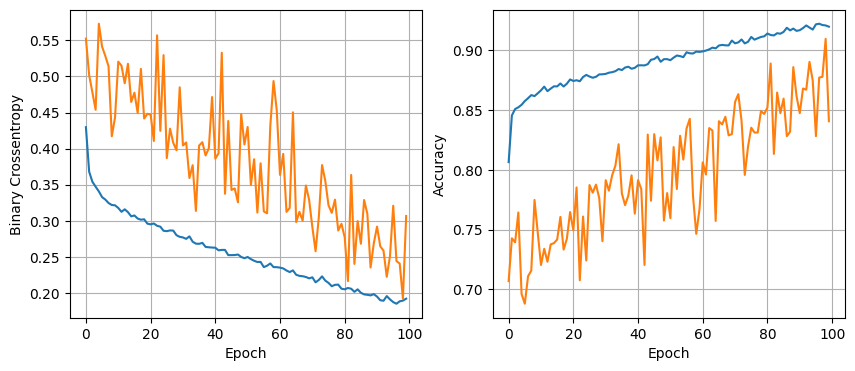

119/119 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8431
64 nodes, dropout 0, lr 0.001, batch size 132


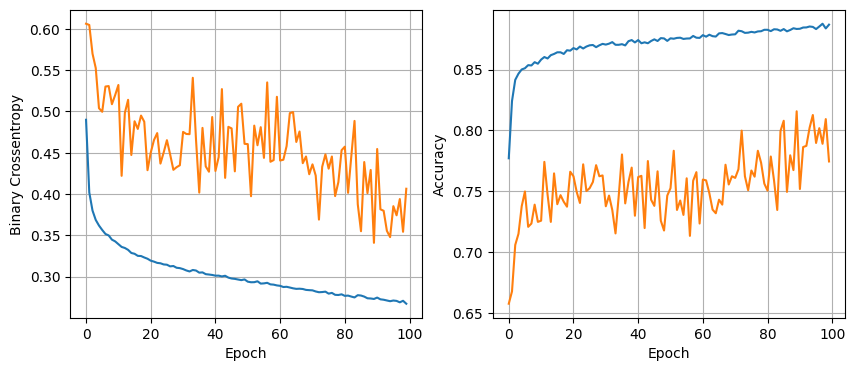

119/119 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8654
64 nodes, dropout 0, lr 0.001, batch size 64


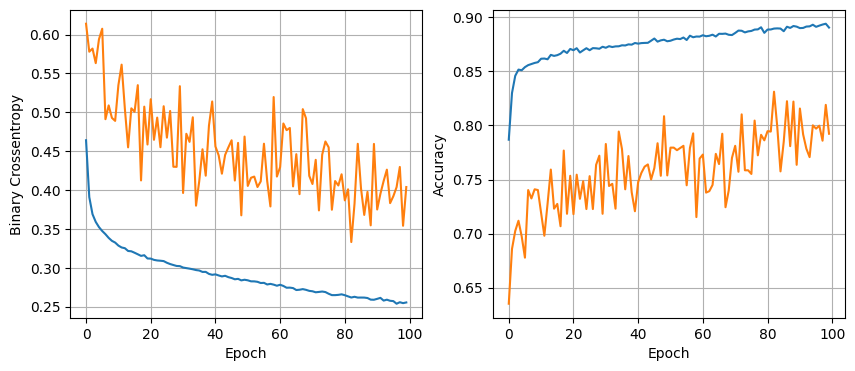

119/119 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 0.8623
64 nodes, dropout 0, lr 0.001, batch size 128


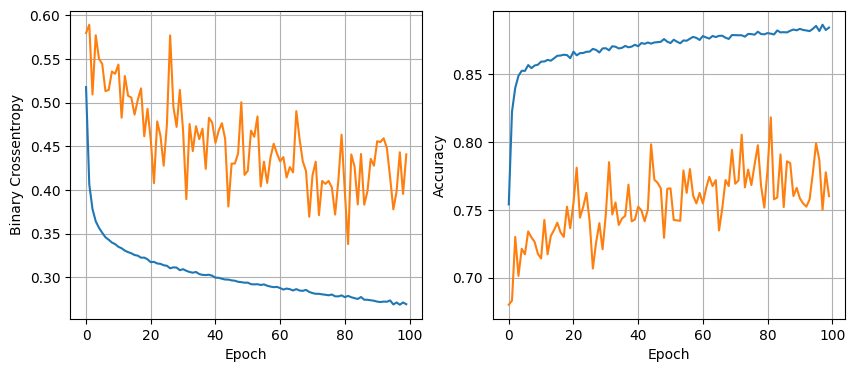

119/119 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8667
64 nodes, dropout 0.2, lr 0.01, batch size 132


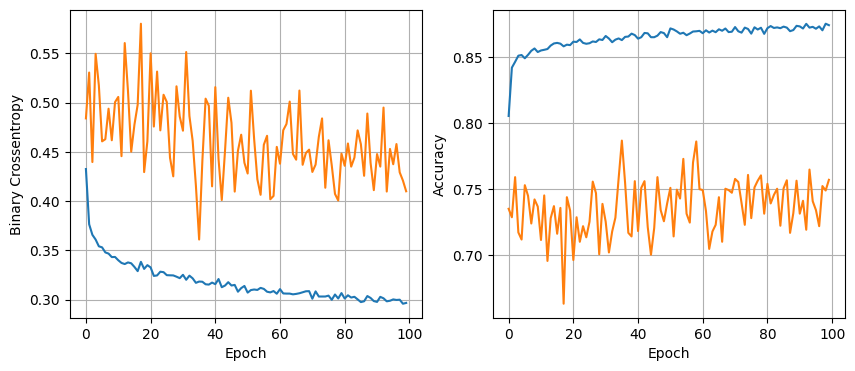

119/119 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.01, batch size 64


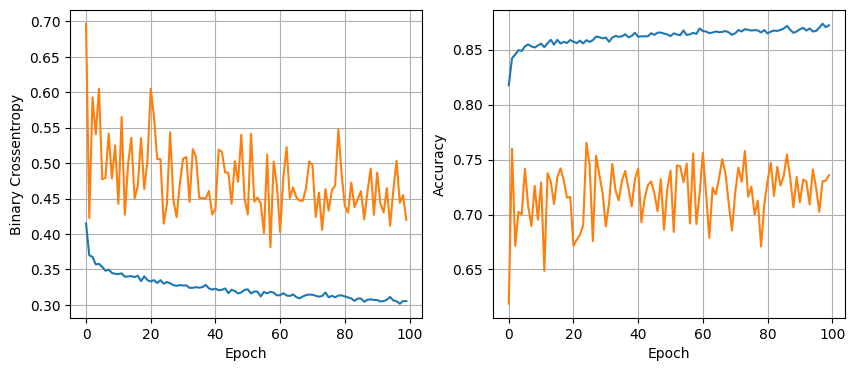

119/119 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8654
64 nodes, dropout 0.2, lr 0.01, batch size 128


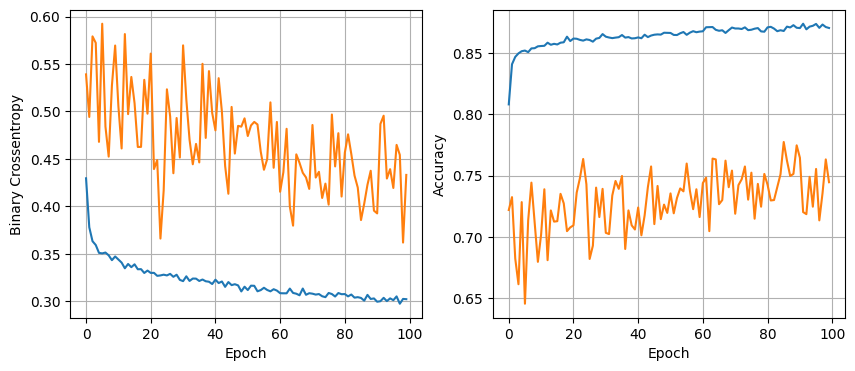

119/119 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8659
64 nodes, dropout 0.2, lr 0.005, batch size 132


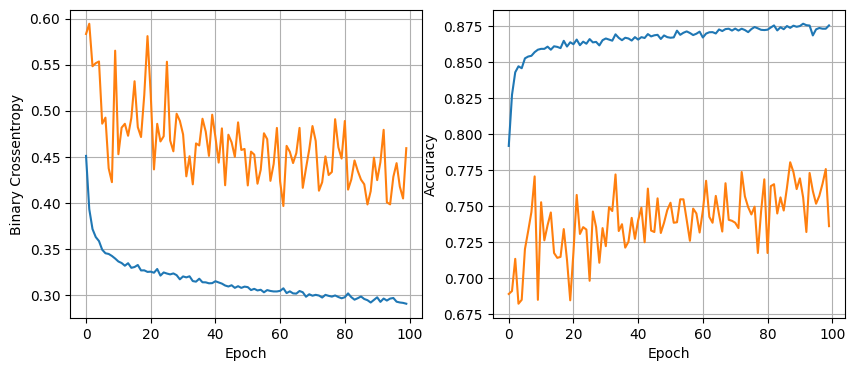

119/119 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.8604
64 nodes, dropout 0.2, lr 0.005, batch size 64


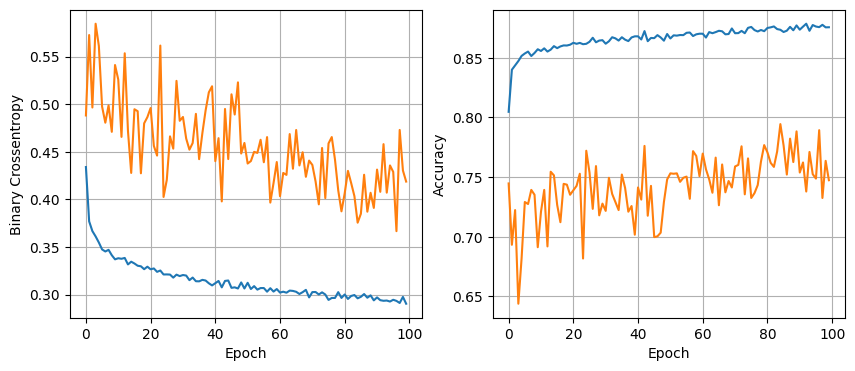

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8649
64 nodes, dropout 0.2, lr 0.005, batch size 128


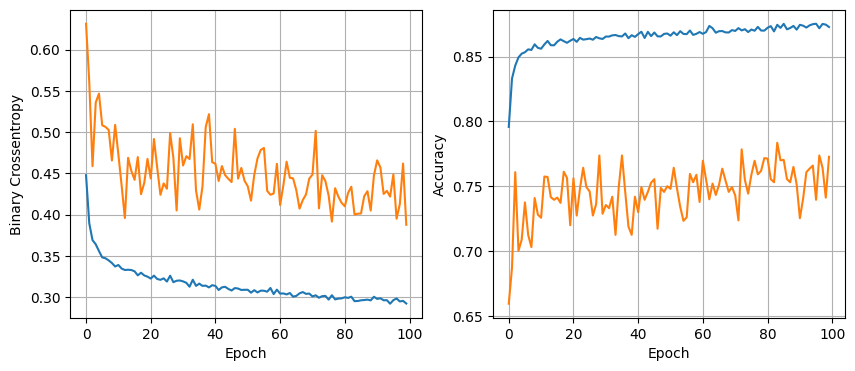

119/119 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8662
64 nodes, dropout 0.2, lr 0.001, batch size 132


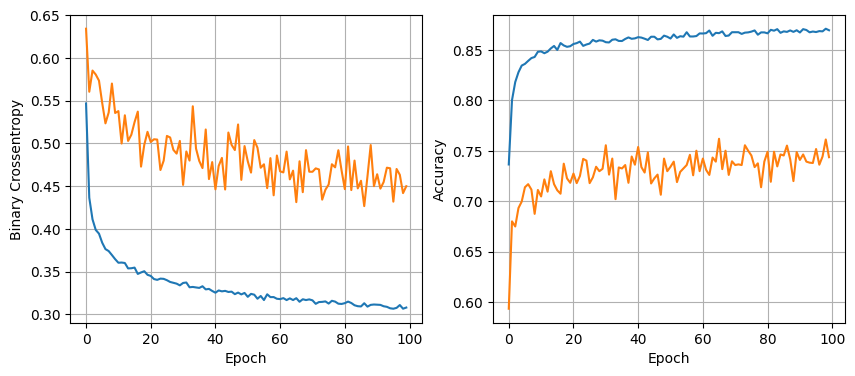

119/119 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8667
64 nodes, dropout 0.2, lr 0.001, batch size 64


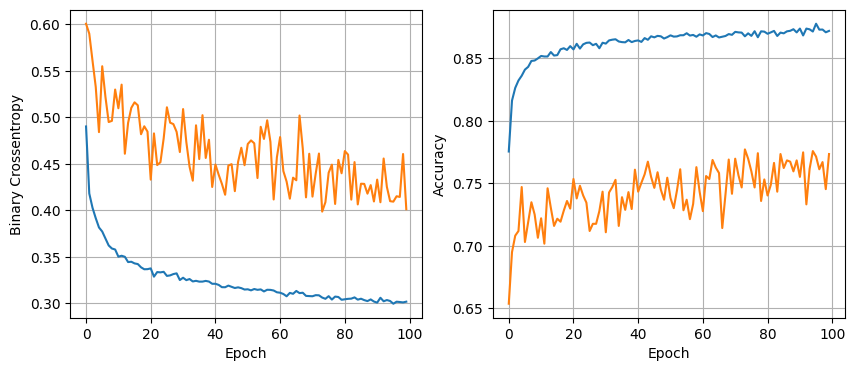

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8633
64 nodes, dropout 0.2, lr 0.001, batch size 128


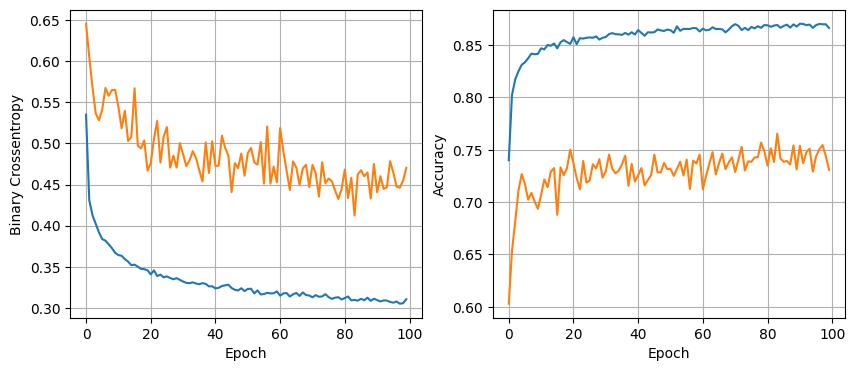

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8704


In [ ]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [132, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]  # Extract the loss value
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


#LSTM

In [ ]:

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/100
462/462 [==============================] - 22s 21ms/step - loss: 0.2138 - val_loss: 0.1765
Epoch 2/100
462/462 [==============================] - 5s 11ms/step - loss: 0.1761 - val_loss: 0.1516
Epoch 3/100
462/462 [==============================] - 6s 13ms/step - loss: 0.1495 - val_loss: 0.1424
Epoch 4/100
462/462 [==============================] - 5s 11ms/step - loss: 0.1411 - val_loss: 0.1370
Epoch 5/100
462/462 [==============================] - 7s 16ms/step - loss: 0.1373 - val_loss: 0.1294
Epoch 6/100
462/462 [==============================] - 7s 15ms/step - loss: 0.1320 - val_loss: 0.1187
Epoch 7/100
462/462 [==============================] - 5s 11ms/step - loss: 0.1279 - val_loss: 0.1170
Epoch 8/100
462/462 [==============================] - 6s 12ms/step - loss: 0.1227 - val_loss: 0.1244
Epoch 9/100
462/462 [==============================] - 5s 11ms/step - loss: 0.1198 - val_loss: 0.1144
Epoch 10/100
462/462 [==============================] - 6s 13ms/step - loss: 0.11